In [2]:
""" 

Biodiversity

Capstone Project 1 - Analyzing Data with Python - Codecademy

Date: March 11, 2022

Author: Mariana Mytiliños

""" 

' \nBiodiversity\n\nCapstone Project 1 - Analyzing Data with Python - Codecademy\n\nDate: March 11, 2022\n\nAuthor: Mariana Mytiliños\n\n'

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import chi2_contingency
import os

user = os.getlogin()

In [4]:
species = pd.read_csv(r"C:/Users/" + user + "/Downloads/species_info.csv")
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
#How many different species are in the species dataframe?
#Answer: 7

numberofspecies = species['category'].nunique()
print(numberofspecies)

7


In [6]:
#What are the different values of category in species?

species_categories = species['category'].unique()
print(species_categories)


['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [7]:
#What are the different values of conservation status?

species_conservationstatus = species['conservation_status'].unique()
print(species_conservationstatus)

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [8]:
#Fill in the NAs to include species that don't require any type of protection

species['conservation_status'].fillna('No Intervention', inplace=True)

#Count how many of the species meet each of the conservation status

conservationstatus = species.groupby('conservation_status').scientific_name.count()
print(conservationstatus)

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
Name: scientific_name, dtype: int64


In [9]:
#Count how many species exist for each category

sumspecies = species.scientific_name.count()
speciesbycategory = species.groupby('category').scientific_name.count()
print(sumspecies)
print(speciesbycategory)

5824
category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
Name: scientific_name, dtype: int64


In [10]:
#Sort the data by scientific name, in order to prepare the data for creating a bar chart of conservation status by species

protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')


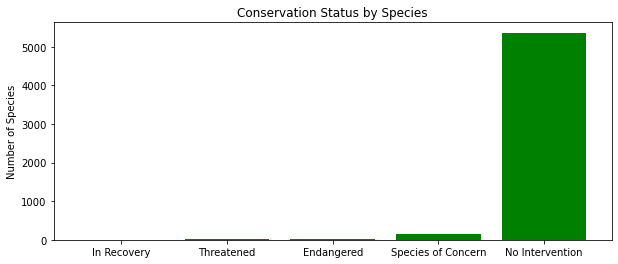

<Figure size 432x288 with 0 Axes>

In [39]:
#Bar chart of conservation status by species

plt.figure(figsize=(10,4))
ax = plt.subplot()
plt.bar(range(len(protection_counts.scientific_name)),protection_counts.scientific_name.values, color = 'green')
ax.set_xticks(range(len(protection_counts.conservation_status)))
ax.set_xticklabels(protection_counts.conservation_status.values)
plt.ylabel('Number of Species')
plt.title('Conservation Status by Species')
plt.show()

plt.savefig(r"C:/Users/" + user + "/Downloads/conservationstatus_barchart.png")

In [12]:
#Identify protected species

species['is_protected'] = species.conservation_status.apply(lambda x: True if x != "No Intervention" else False)
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


In [13]:
#Calculate percent of conservation status

conservationstatus_counts = species.groupby(['category', 'conservation_status']).scientific_name.nunique().reset_index()
conservationstatus_pivot = conservationstatus_counts.pivot(columns='conservation_status', index='category', values='scientific_name').reset_index()
print(conservationstatus_pivot)

conservation_status           category  Endangered  In Recovery  \
0                            Amphibian         1.0          NaN   
1                                 Bird         4.0          3.0   
2                                 Fish         3.0          NaN   
3                               Mammal         6.0          1.0   
4                    Nonvascular Plant         NaN          NaN   
5                              Reptile         NaN          NaN   
6                       Vascular Plant         1.0          NaN   

conservation_status  No Intervention  Species of Concern  Threatened  
0                               72.0                 4.0         2.0  
1                              413.0                68.0         NaN  
2                              115.0                 4.0         4.0  
3                              146.0                22.0         2.0  
4                              328.0                 5.0         NaN  
5                               73.0 

In [14]:
#Count the unique scientific names in each grouping

category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
print(category_counts.head())

    category  is_protected  scientific_name
0  Amphibian         False               72
1  Amphibian          True                7
2       Bird         False              413
3       Bird          True               75
4       Fish         False              115


In [15]:
#Pivot data

category_pivot = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
print(category_pivot)

is_protected           category  False  True
0                     Amphibian     72     7
1                          Bird    413    75
2                          Fish    115    11
3                        Mammal    146    30
4             Nonvascular Plant    328     5
5                       Reptile     73     5
6                Vascular Plant   4216    46


In [16]:
#Rename columns

category_pivot.columns = ['category', 'not_protected', 'protected']
print(category_pivot.head())

            category  not_protected  protected
0          Amphibian             72          7
1               Bird            413         75
2               Fish            115         11
3             Mammal            146         30
4  Nonvascular Plant            328          5


In [17]:
#Calculate the % of protected species

category_pivot['percent_protected'] = (category_pivot.protected / (category_pivot.protected + category_pivot.not_protected)) * 100
print(category_pivot)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           8.860759
1               Bird            413         75          15.368852
2               Fish            115         11           8.730159
3             Mammal            146         30          17.045455
4  Nonvascular Plant            328          5           1.501502
5            Reptile             73          5           6.410256
6     Vascular Plant           4216         46           1.079305


In [18]:
#Will perform a chi squared test (since we are comparing two samples of categorical data) to check if the difference in protection between mammals and birds is significant 

#Create a contingency table for the chi squared test, which contains the number of protected and non protected mammals, and the number of protected and non protected birds

contingency_mammalsandbirds = [[30, 146], [75, 413]]

In [19]:
#Run the chi2 test between the protection of mammals and birds

chi2_test = chi2_contingency(contingency_mammalsandbirds)
pvalue = chi2_test[1]
print(pvalue)

#Since the pvalue is over 0.05, it means the difference between the protection of birds and mammals is not significant

0.6875948096661336


In [20]:
#Will perform a chi squared test to check if the difference in protection between mammals and amphibians is significant 

contingency_mammalsandamphibians = [[30, 146], [7, 72]]
chi2_test = chi2_contingency(contingency_mammalsandamphibians)
pvalue = chi2_test[1]
print(pvalue)

0.12757669693198975


In [21]:
#Will perform a chi squared test to check if the difference in protection between mammals and reptiles is significant 

contingency_mammalsandreptiles = [[30, 146], [5, 73]]
chi2_test = chi2_contingency(contingency_mammalsandreptiles)
pvalue = chi2_test[1]
print(pvalue)

#Since the pvalue is less than 0.05, it means the difference between the protection of mammals and reptiles is significant

0.03835559022969898


In [22]:
#Load data of sightings of different species

observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [23]:
#Identify which rows of species are referring to sheeps

species['is_sheep'] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)
sheeps = species[species['is_sheep'] == True]

sheep_species = species[(species['is_sheep'] == True) & (species['category'] == 'Mammal')]
print(sheep_species.head())

     category          scientific_name  \
3      Mammal               Ovis aries   
3014   Mammal          Ovis canadensis   
4446   Mammal  Ovis canadensis sierrae   

                                           common_names conservation_status  \
3     Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3014                       Bighorn Sheep, Bighorn Sheep  Species of Concern   
4446                        Sierra Nevada Bighorn Sheep          Endangered   

      is_protected  is_sheep  
3            False      True  
3014          True      True  
4446          True      True  


In [24]:
#Merge sheep_species with observations to get observations of sheeps

sheep_observations = pd.merge(sheep_species, observations, how='left', left_on='scientific_name', right_on='scientific_name')
print(sheep_observations.head())

  category  scientific_name  \
0   Mammal       Ovis aries   
1   Mammal       Ovis aries   
2   Mammal       Ovis aries   
3   Mammal       Ovis aries   
4   Mammal  Ovis canadensis   

                                        common_names conservation_status  \
0  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
1  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
2  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                       Bighorn Sheep, Bighorn Sheep  Species of Concern   

   is_protected  is_sheep                            park_name  observations  
0         False      True               Yosemite National Park           126  
1         False      True  Great Smoky Mountains National Park            76  
2         False      True                  Bryce National Park           119  
3         False      True            Yel

In [25]:
#Calculate amount of sheep observations at each national park

obs_by_park = sheep_observations.groupby('park_name').observations.sum().reset_index()
print(obs_by_park.head())

                             park_name  observations
0                  Bryce National Park           250
1  Great Smoky Mountains National Park           149
2            Yellowstone National Park           507
3               Yosemite National Park           282


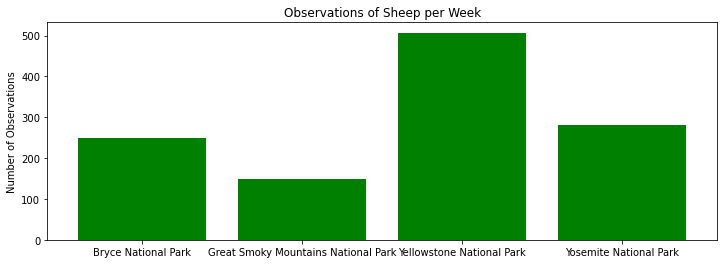

In [37]:
#Bar chart showing the different number of observations per week at each park

plt.figure(figsize=(12,4))
ax = plt.subplot()
plt.bar(range(len(obs_by_park.observations)),obs_by_park.observations.values, color='green')
ax.set_xticks(range(len(obs_by_park.observations)))
ax.set_xticklabels(obs_by_park.park_name.values)
plt.ylabel('Number of Observations')
plt.title('Observations of Sheep per Week')
plt.show()

In [27]:
#Sample size calculation for the foot and mouth disease reduction program test:
#Baseline conversion rate: 15% of sheep at Bryce National Park have foot and mouth disease
#Minimum detectable effect: Detect reductions of at least 5 percentage points
#Statistical significance to use: 90%

#Sample size to use is 39000


In [33]:
#How many weeks should we observe sheep at Bryce National Park in order to observe enough sheep

bryceweeksofobs = 39000 / 250 
print(bryceweeksofobs)

#How many weeks should we observe sheep at Yellowstone National Park in order to observe enough sheep

yellowstoneweeksofobs = 39000 / 507
print(yellowstoneweeksofobs)

#How many weeks should we observe sheep at Great Smoky Mountains National Park in order to observe enough sheep

gsmweeksofobs = 39000 / 149
print(gsmweeksofobs)

#How many weeks should we observe sheep at Yosemite National Park in order to observe enough sheep

yosemiteweeksofobs = 39000 / 282
print(yosemiteweeksofobs)

156.0
76.92307692307692
261.744966442953
138.29787234042553
